# DATA UNDERSTANDING

This data contain informations about customers of a Mall.There is 200 Observations of 5 Variable. Name of Variables are:-'CustomerID' 'Gender' 'Age' 'Annual.Income..k..' 'Spending.Score..1.100.' DataTypes of Datas are Integere or Factor.

In [1]:
data=read.csv("../input/Mall_Customers.csv")
str(data)
names(data)
head(data)
summary(data$Age)
sd(data$Age)
summary(data$Annual.Income..k..)
sd(data$Annual.Income..k..)
summary(data$Age)
sd(data$Spending.Score..1.100.)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
<int>,<fct>,<int>,<int>,<int>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 25.82352

# Visualization of Gender

We can see clearly that Population of Female is more than Male. We can also see in Pie Chart that Female is 56% and Male is 44% in whole Population.

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
<int>,<fct>,<int>,<int>,<int>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


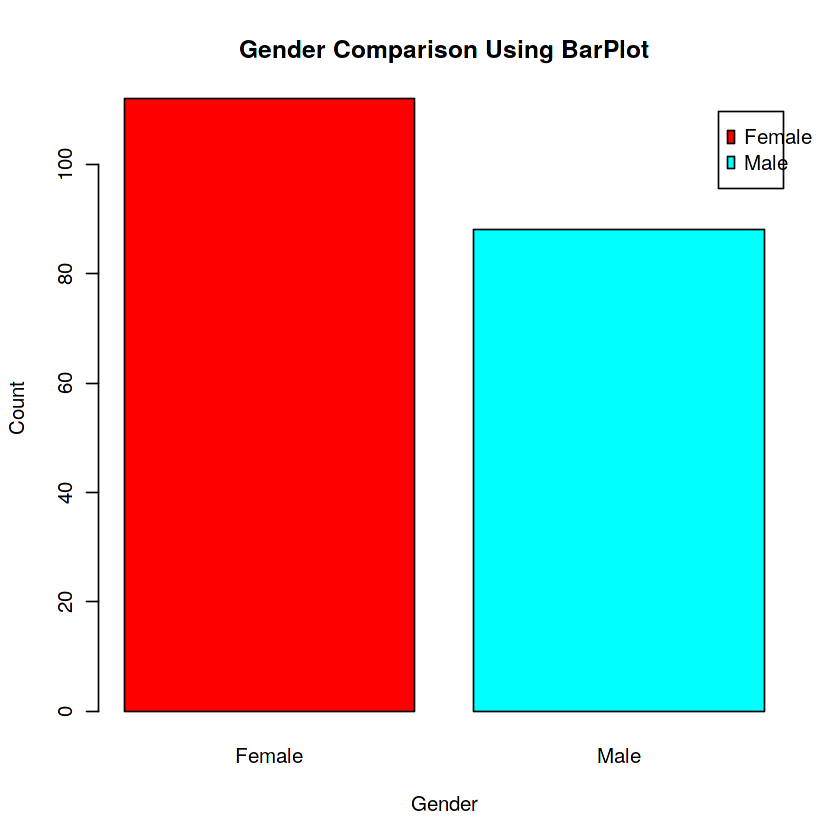

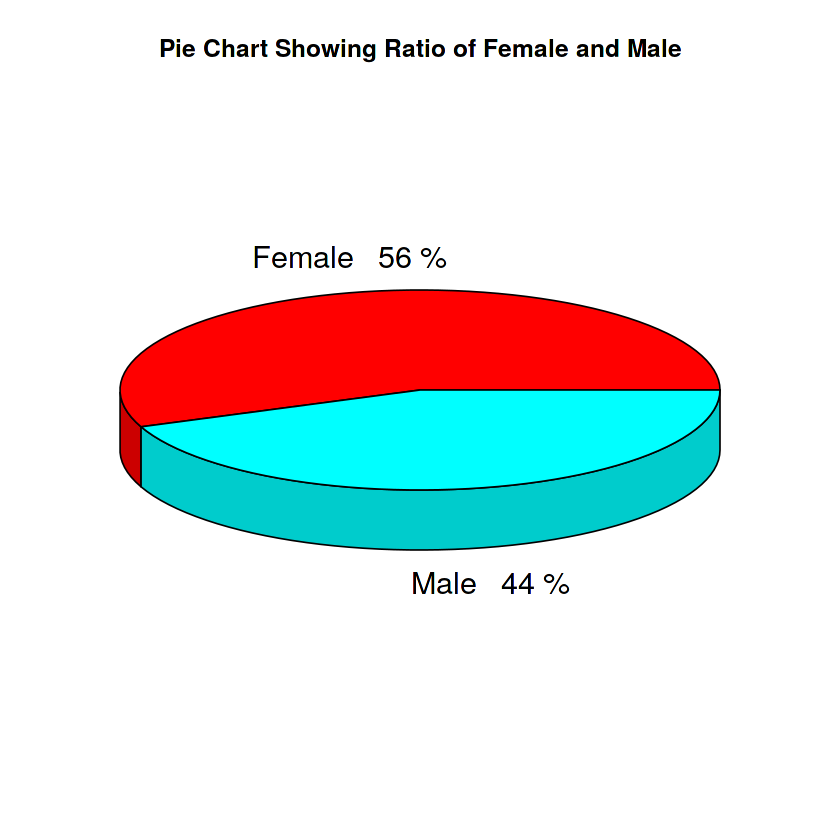

In [2]:
head(data)
a=table(data$Gender)
barplot(a,main="Gender Comparison Using BarPlot",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
     main="Pie Chart Showing Ratio of Female and Male")

# Visualization/Analysis of Age

We can Clearly see that Maximum population is between Age Group 30 to 35. We can alse see Descreptive Analysis that Minimum age is 18, Maximum age is 70 and avg. age is 38.85. We can see Descriptive Analysis of Age through Box Plot also.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

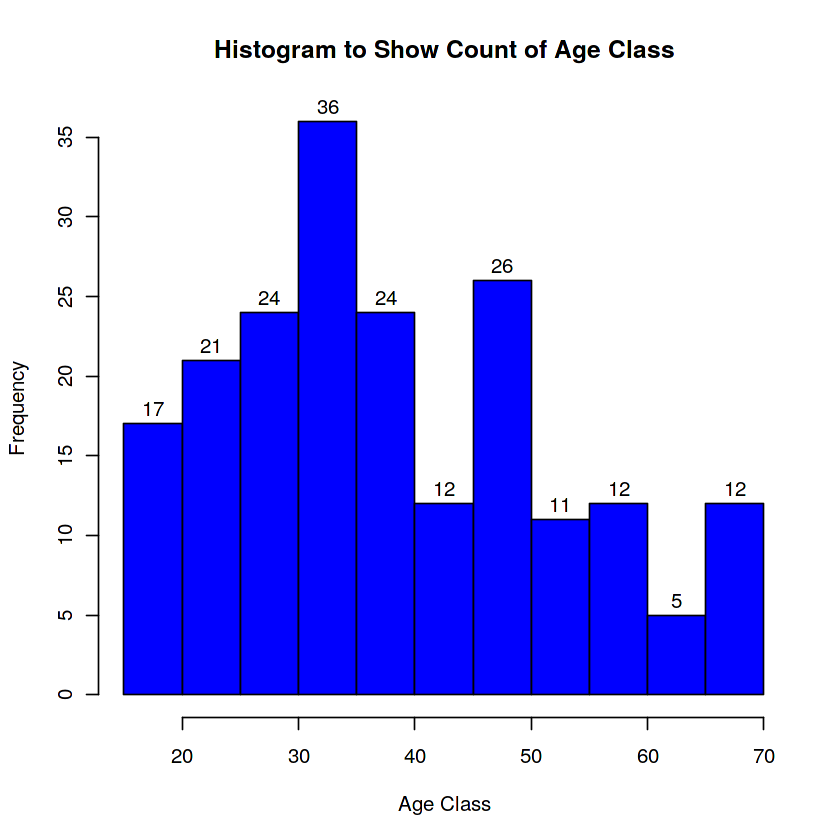

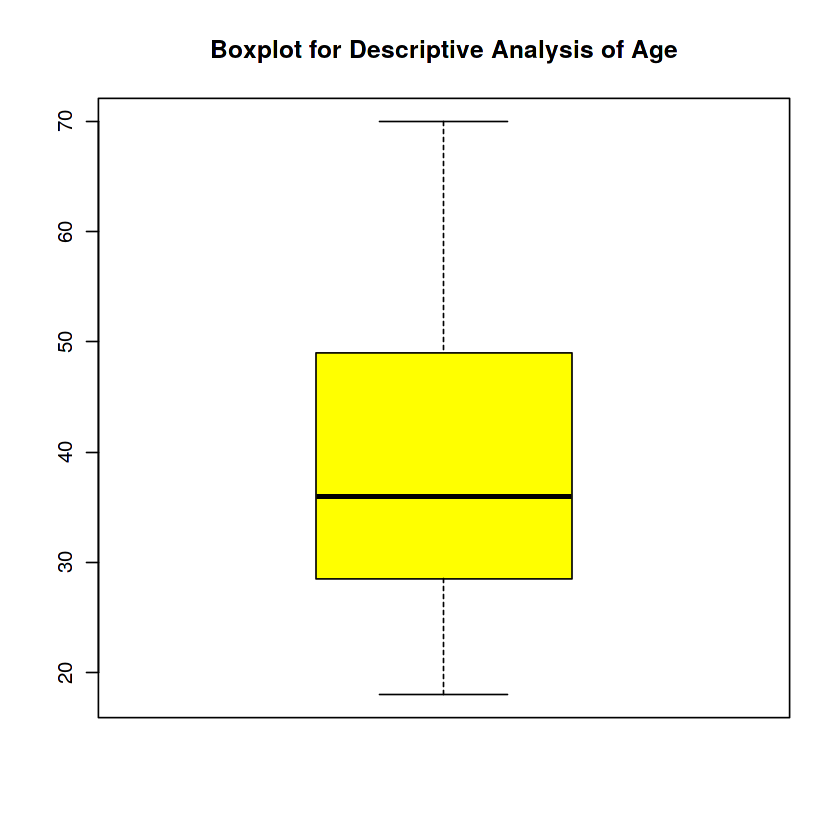

In [3]:
summary(data$Age)
hist(data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)
boxplot(data$Age,
       col="yellow",
       main="Boxplot for Descriptive Analysis of Age")

# Analysis of Annual Income

We can see Descriptive Analysis that Minimum AI is 15 and Maximimum is 137 with an avg. annual income of 60.56 unit. We can see clearly in HistoGram that Maximum Population have Annual Income between 70 to 80 units. We can see in Kernel Density Plot of Annual Income, AI is distributed Normally.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

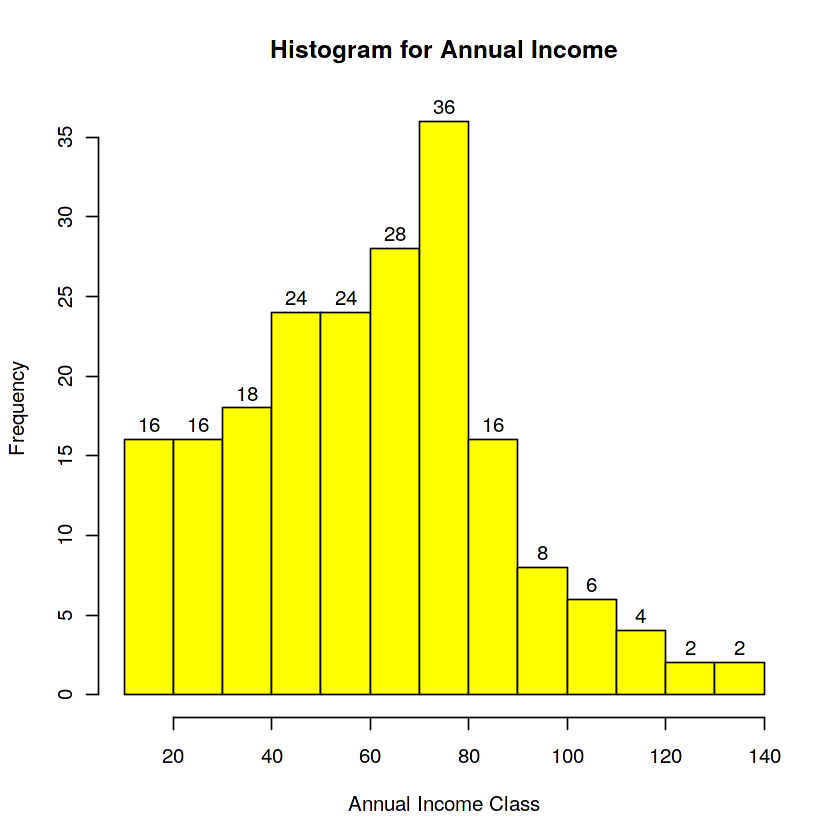

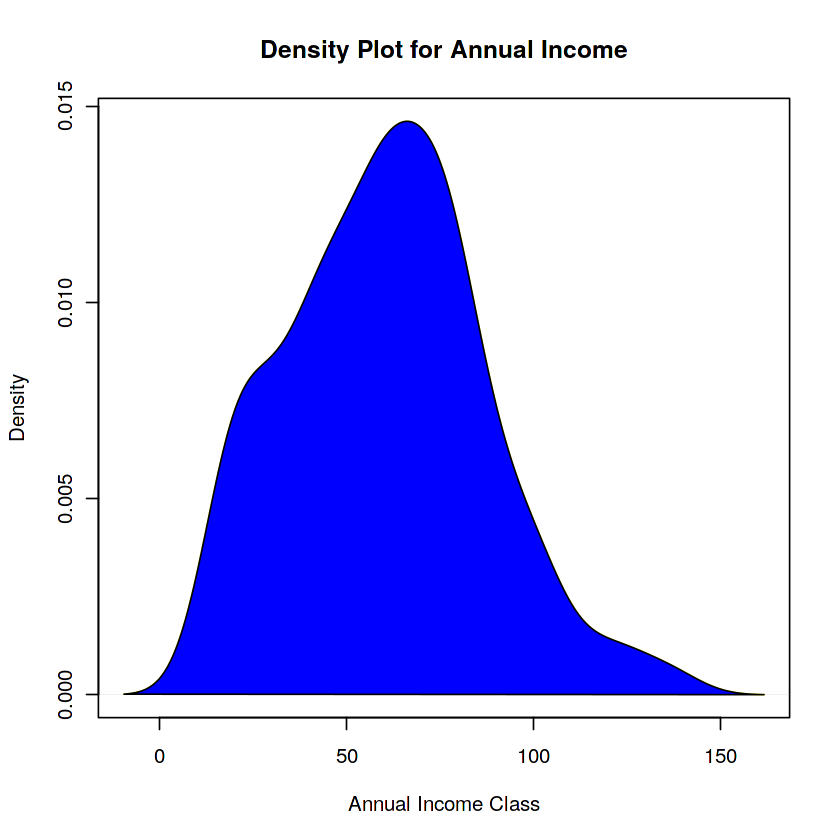

In [4]:
summary(data$Annual.Income..k..)
hist(data$Annual.Income..k..,
    col="yellow",
    main="Histogram for Annual Income",
    xlab="Annual Income Class",
    ylab="Frequency",
    labels=TRUE)
plot(density(data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(data$Annual.Income..k..),
       col="blue")

# Analysis of Spending Score

We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. We can visualize Descriptive Analysis with BoxPlot. We can see in Histogram that Max people have Spending Score between 40 and 50.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

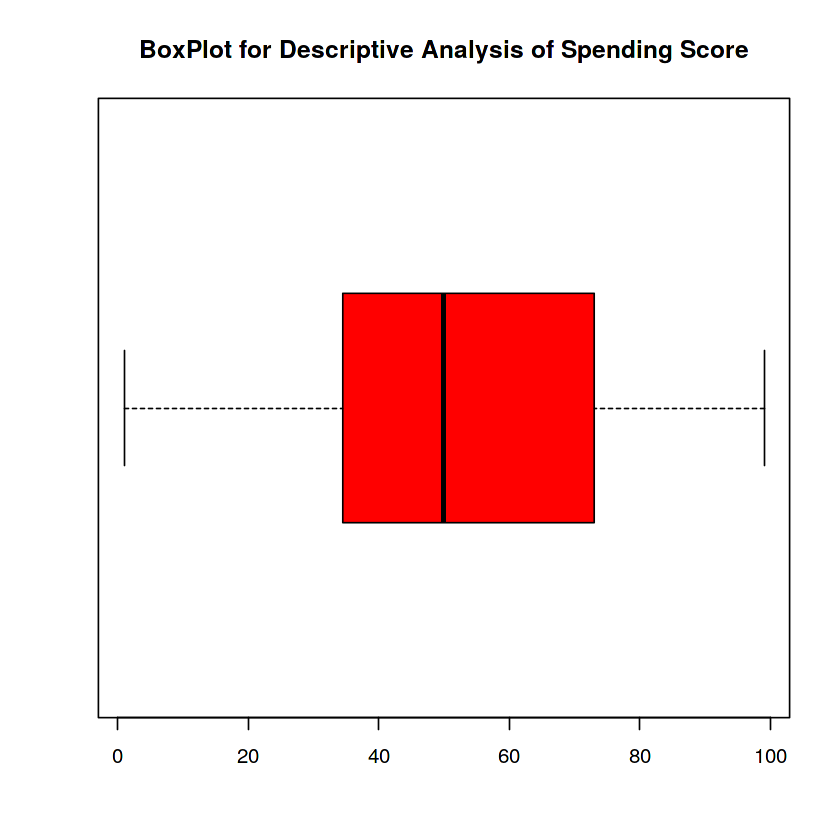

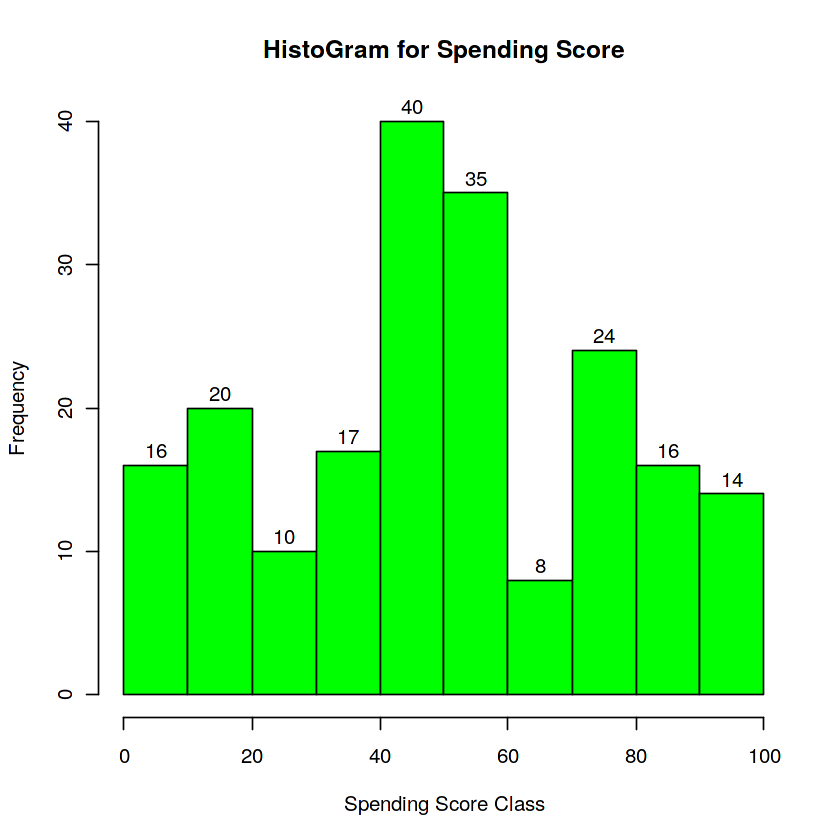

In [5]:
summary(data$Spending.Score..1.100.)
boxplot(data$Spending.Score..1.100.,
       horizontal=TRUE,
       col="red",
       main="BoxPlot for Descriptive Analysis of Spending Score")
hist(data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="green",
    labels=TRUE)

# Data Preparation for Model Building

We will take Only Annual Income and Spending Score to segment Customers. We do not need extra Data Manipulation because Data is already clean.

In [6]:
dataNew=data[,c(4,5)]

# Best K for K Mean

Finding best K for K mean using Elbow Method.We can see at k=5, Elbow is Bending so k=5 is best number of Cluster in this case.

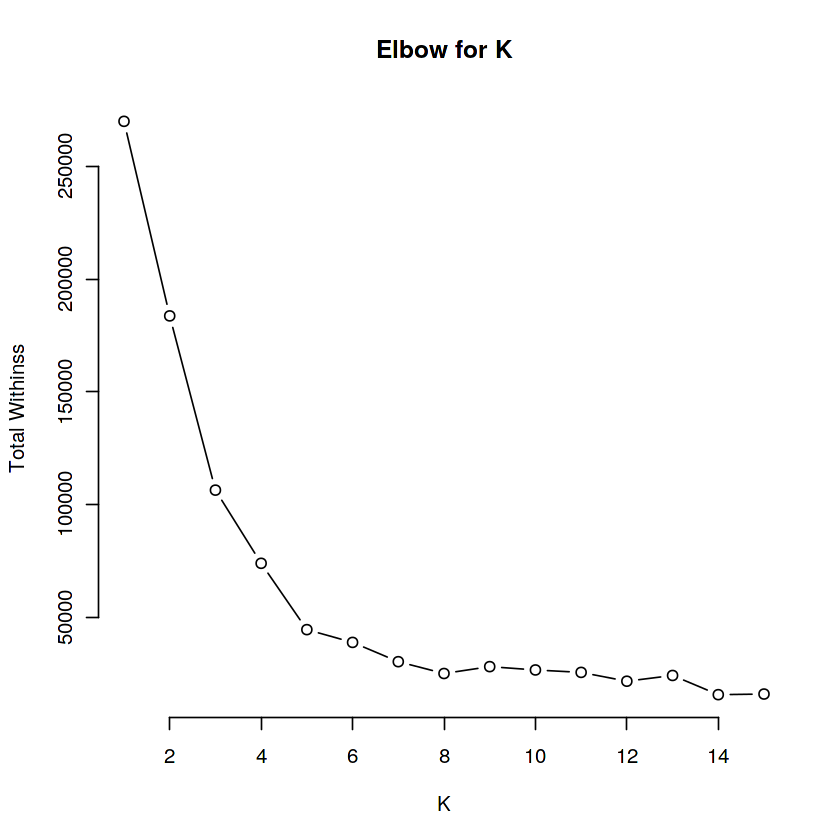

In [7]:
wss=sapply(1:15,function(x){kmeans(dataNew,x)$tot.withinss})
plot(1:15,wss,main="Elbow for K",xlab="K",ylab="Total Withinss",frame=FALSE,type="b")

# Model Building

We can see there is 5 Cluster Center, It means customers are divided in 5 segments. We can also see cluster vector and Within Cluster Sum.

In [8]:
model=kmeans(dataNew,5)
model

K-means clustering with 5 clusters of sizes 38, 100, 23, 29, 10

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1           87.00000               18.63158
2           48.26000               56.48000
3           26.30435               20.91304
4           78.55172               82.17241
5          109.70000               82.00000

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
[149] 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 5 1 5 1
[186] 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5

Within cluster sum of squares by cluster:
[1] 14204.842 40932.200  5098.696  3717.310  2512.100
 (between_SS / total_SS =  75.4 %)

Available components:

[1] "cluster"      "centers"      "totss"   

# Summary

We will now see Clusters and their Summary.

In [9]:
segments=model$cluster
final_data=cbind(data,segments)
write.csv(final_data,"final_data.csv")
model$centers
model$withinss
model$tot.withinss

Annual.Income..k..,Spending.Score..1.100.
87.00000,18.63158
48.26000,56.48000
26.30435,20.91304
78.55172,82.17241
109.70000,82.00000


[1] 14204.842 40932.200  5098.696  3717.310  2512.100

[1] 66465.15